In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from golomb_code import encode, decode
import os
from butterworth import butter_bandpass_filter_zi
from scipy.interpolate import make_interp_spline

In [2]:
'''
each column represent the one light source in the ppg sensor
sampling rate is 24 samples per second which is ideal as the ppg relies between 0.5 and 5hz
'''

data = pd.read_csv('0000.csv')
data.head()

,1649438306,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,98,74722.0,252665.0,264880.0
1,98,74761.0,252726.0,264924.0
2,98,74801.0,252745.0,264944.0
3,98,74787.0,252654.0,264851.0
4,98,74706.0,252366.0,264568.0


## unfiltered PPG data

Text(0, 0.5, 'Frequency')

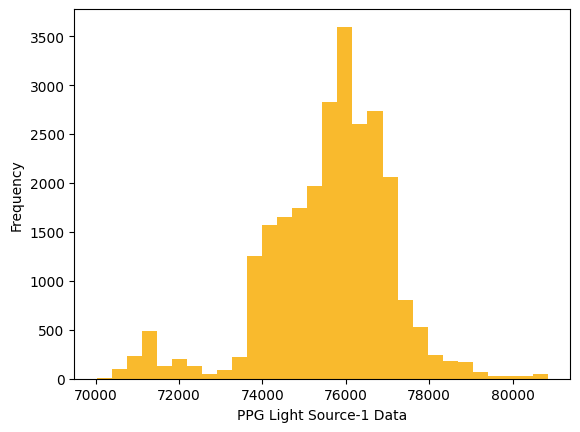

In [9]:
column_1_unfil = data['Unnamed: 1'].dropna(inplace=False)
plt.hist(column_1_unfil, bins=30,  color='#F9BA2D')
plt.xlabel('PPG Light Source-1 Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

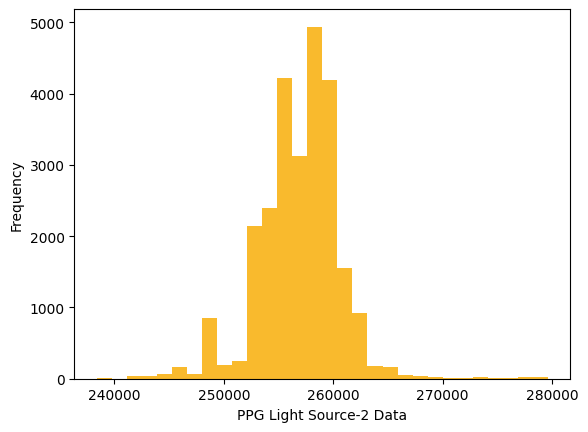

In [10]:
column_2_unfil = data['Unnamed: 2'].dropna(inplace=False)
plt.hist(column_2_unfil, bins=30,  color='#F9BA2D')
plt.xlabel('PPG Light Source-2 Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

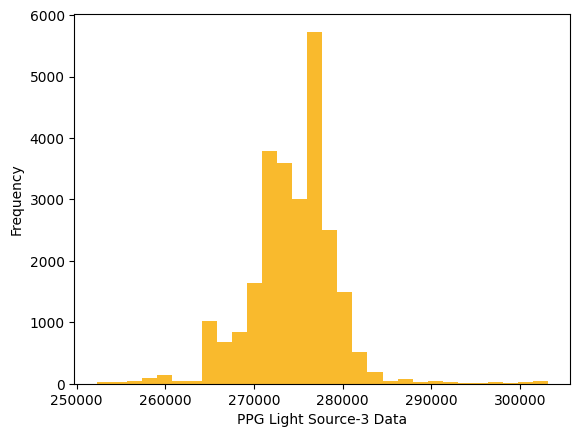

In [11]:
column_3_unfil = data['Unnamed: 3'].dropna(inplace=False)
plt.hist(column_3_unfil, bins=30,  color='#F9BA2D')
plt.xlabel('PPG Light Source-3 Data')
plt.ylabel('Frequency')